In [43]:
#import necessary packages
import pandas as pd
import numpy as np
import re

In [44]:
#maturity indicator (generated list with chatgpt)
maturity_indicators = {
    #high‑maturity indicators (5)
    "implemented": 5,
    "in production": 5,
    "enterprise-wide": 5,
    "deployed": 5,
    "operational": 5,
    "live": 5,
    "active": 5,
    "fully implemented": 5,
    "established": 5,
    "integrated": 5,
    "adopted": 5,
    "production-ready": 5,
    "mainstream": 5,
    "standardized": 5,
    "institutionalized": 5,
    "optimized": 5,
    "scalable": 5,
    "robust": 5,
    "company-wide": 5,
    "production": 5,
    "enterprise": 5,
    "deployed": 5,
    "operational": 5,
    "implemented": 5,
    "integrated": 5,
    #medium‑maturity indicators (3)
    "piloting": 3,
    "rolling out": 3,
    "testing": 3,
    "in trial": 3,
    "beta testing": 3,
    "under pilot": 3,
    "prototype": 3,
    "proof of concept": 3,
    "field trial": 3,
    "limited deployment": 3,
    "early-stage": 3,
    "evaluating": 3,
    "pilot": 3,
    "prototype": 3,
    "concept": 3,
    "deployment": 3,
    "trial": 3,
    "beta": 3,
    "evaluating": 3,
    #low‑maturity indicators (1)
    "exploring": 1,
    "planning to": 1,
    "investigating": 1,
    "considering": 1,
    "scoping": 1,
    "studying": 1,
    "conceptualizing": 1,
    "ideating": 1,
    "brainstorming": 1,
    "drafting": 1,
    "preliminary research": 1,
    "initial design": 1,
    "requirements gathering": 1,
    "planning": 1,
    "investigating": 1,
    "prototype": 1,
    "research": 1,
    "design": 1,
    "requirements": 1,
}

#general preprocessing
def preprocess_phrase(phrase: str) -> str:
    return phrase.lower().replace('-', ' ')

indicators = { preprocess_phrase(p): s for p, s in maturity_indicators.items() }

In [45]:
#creating keywords list
keywords = [
    "ai", "artificial intelligence", "machine learning", "deep learning",
    "data", "big data", "data science", "data engineering", "data analytics",
    "cloud computing", "edge computing",
    #cloud providers
    "AWS", "Microsoft Azure", "Google Cloud", "IBM Watson", "Oracle Cloud",
    #data warehousing
    "Snowflake", "Databricks", "Cloudera", "Teradata",
    #business intellgience
    "Tableau", "Power BI", "Qlik", "SAS",
    #AI/ML platforms
    "DataRobot", "C3.ai", "H2O.ai", "Palantir", "OpenAI",
    #data integration & ETL
    "Informatica", "Talend", "Fivetran",
    #data governance & observability
    "Collibra", "Monte Carlo", "Datafold",
    #consulting & system integrators
    "Accenture", "Deloitte", "PwC", "Capgemini",
    #AI hardware & acceleration
    "NVIDIA"
]

In [46]:
#tokenization method
def preprocess_text(text: str) -> list[str]:
    text = text.lower().replace('-', ' ')
    text = re.sub(r'[^\w\s]', '', text)
    return text.split()

In [47]:
#maturity scoring framework
def maturity_score_strict(
    text: str,
    keywords: list[str],
    indicators: dict[str, float],
    window: int = 5 #this is the window between indicator list terms and keyword terms (can be increased to make it more loose or increased to make it more strict)
) -> float:
    tokens = preprocess_text(text)
    L = len(tokens)
    context_scores: list[float] = []

    for kw in keywords:
        parts = kw.lower().split()
        n = len(parts)
        for i in range(L - n + 1):
            if tokens[i:i+n] == parts:
                lo = max(0, i - window)
                hi = min(L, i + n + window)
                ctx = " ".join(tokens[lo:hi])
                hits = [score for phrase, score in indicators.items() if phrase in ctx]
                context_scores.append(float(np.mean(hits)) if hits else 2.0)

    return float(np.mean(context_scores)) if context_scores else 2.0

In [48]:
#load in data, normalize using min max scaling, and print results
df = pd.read_csv(
    '/Users/arunnimmagadda/Downloads/text_data_by_bank (1).csv',
    usecols=[0, 1],
    names=['Bank Name', 'Text'],
    header=0
)

df['Maturity_Score_Strict'] = (
    df['Text']
      .apply(lambda txt: maturity_score_strict(txt, keywords, indicators, window=5))
      .round(3)
)

#min–max normalize to [1,5]
raw_min = df['Maturity_Score_Strict'].min()
raw_max = df['Maturity_Score_Strict'].max()

df['Normalized_Maturity_Score_Strict'] = (
    (df['Maturity_Score_Strict'] - raw_min)
    / (raw_max - raw_min) * 4
    + 1
).round(3)

#print results
print(df[['Bank Name','Maturity_Score_Strict','Normalized_Maturity_Score_Strict']])

                                  Bank Name  Maturity_Score_Strict  \
0                        ally_financial_inc                  2.052   
1                  american_express_company                  2.188   
2                  ameriprise_financial_inc                  2.167   
3                      associated_banc-corp                  2.034   
4                      bank_of_america_corp                  2.027   
5              bank_of_new_york_mellon,_the                  2.047   
6                 bok_financial_corporation                  2.042   
7         capital_one_financial_corporation                  2.007   
8           charles_schwab_corporation,_the                  2.014   
9                             citigroup_inc                  2.078   
10            citizens_financial_group,_inc                  2.070   
11             columbia_banking_system,_inc                  2.000   
12                    comerica_incorporated                  2.194   
13                  

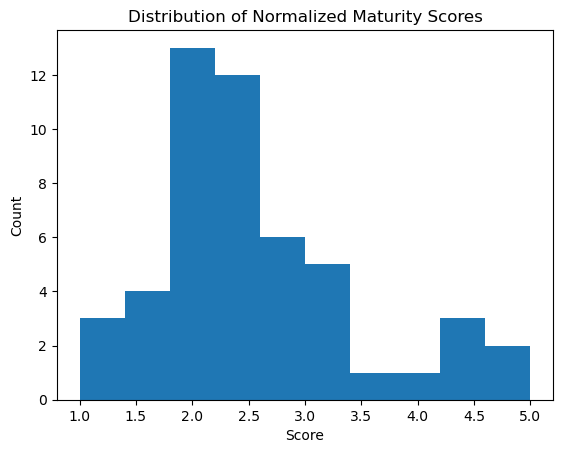

In [49]:
#histogram
plt.figure()
plt.hist(df['Normalized_Maturity_Score_Strict'], bins=10)
plt.title("Distribution of Normalized Maturity Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

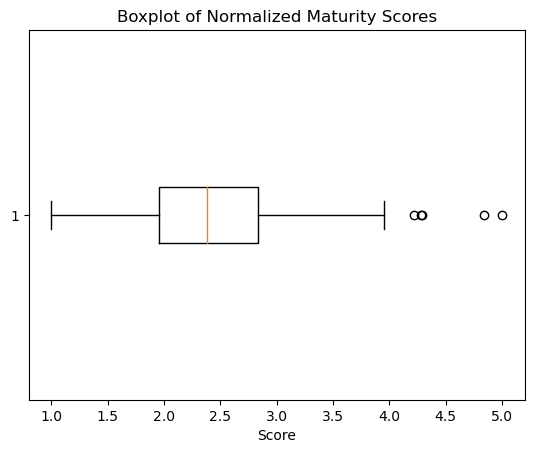

In [50]:
#boxplot
plt.figure()
plt.boxplot(df['Normalized_Maturity_Score_Strict'], vert=False)
plt.title("Boxplot of Normalized Maturity Scores")
plt.xlabel("Score")
plt.show()

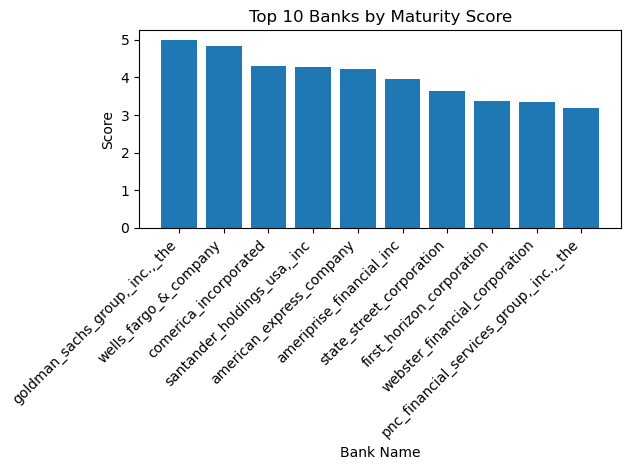

In [51]:
#top ten bar chart
top10 = df.nlargest(10, 'Normalized_Maturity_Score_Strict')
plt.figure()
plt.bar(top10['Bank Name'], top10['Normalized_Maturity_Score_Strict'])
plt.title("Top 10 Banks by Maturity Score")
plt.xlabel("Bank Name")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [53]:
output_path = '/Users/arunnimmagadda/Downloads/maturity_scores.xlsx'
try:
    df[['Bank Name','Maturity_Score_Strict','Normalized_Maturity_Score_Strict']].to_excel(output_path, index=False)
    print(f"Saved strict maturity scores to: {output_path}")
except NameError:
    print("DataFrame `df` not found. Please ensure you've computed the strict scores before running this cell.")

Saved strict maturity scores to: /Users/arunnimmagadda/Downloads/maturity_scores.xlsx
